# Analyze music listening trends on Spotify and Youtube
### Spotify and Youtube dataset: Dataset of songs of various artist in the world and for each song is present:
* Several statistics of the music version on spotify, including the number of streams.
* Number of views of the official music video of the song on youtube.


## Import libraries and dataset

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Read dataset

In [79]:
# Read dataset
df = pd.read_csv('./data/Spotify_Youtube.csv')

In [80]:
# shape of dataset
df.shape

(20718, 28)

In [81]:
# View dataset
display(df.head(20))

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.82,0.70,6.00,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,"693,555,221.00","6,220,896.00","169,907.00",Official HD Video for Gorillaz' fantastic trac...,True,True,"1,040,234,854.00"
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.68,0.70,8.00,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,"72,011,645.00","1,079,128.00","31,003.00",The official video for Gorillaz - Rhinestone E...,True,True,"310,083,733.00"
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.69,0.92,1.00,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,"8,435,055.00","282,142.00","7,399.00",Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,"63,063,467.00"
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.69,0.74,2.00,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,"211,754,952.00","1,788,577.00","55,229.00",Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,"434,663,559.00"
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.66,0.69,10.00,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,"618,480,958.00","6,197,318.00","155,930.00",The official music video for Gorillaz - Clint ...,True,True,"617,259,738.00"
5,5,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,DARE,Demon Days,album,spotify:track:4Hff1IjRbLGeLgFgxvHflk,0.76,0.89,11.00,...,https://www.youtube.com/watch?v=uAOR6ib95kQ,Gorillaz - DARE (Official Video),Gorillaz,"259,021,161.00","1,844,658.00","72,008.00",Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,"323,850,327.00"
6,6,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown) ...,New Gold (feat. Tame Impala and Bootie Brown) ...,single,spotify:track:2c3KCGq6UojB2c8UAFrRON,0.72,0.90,4.00,...,https://www.youtube.com/watch?v=BONNm0F7Tto,"Gorillaz - New Gold ft. Tame Impala, Bootie Br...",Dom Dolla,"451,996.00","11,686.00",241.00,"Gorillaz 'New Gold' ft. Tame Impala, Bootie Br...",False,True,"10,666,154.00"
7,7,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,She's My Collar (feat. Kali Uchis),Humanz (Deluxe),album,spotify:track:3lIxtCaROdRDuTnNBDm3n2,0.73,0.81,11.00,...,https://www.youtube.com/watch?v=f8NwLXYIHS4,Gorillaz - She's My Collar [HQ],SalvaMuñox,"1,010,982.00","17,675.00",260.00,𝐁̲𝐎̲𝐍̲𝐔̲𝐒̲:̲ Hu̳ma̳n̳z [̲̠̲𝐃̲̠̲𝐄̲̠̲𝐅̲̠̲𝐈̲̠̲𝐍̲̠...,False,False,"159,605,929.00"
8,8,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Cracker Island (feat. Thundercat),Cracker Island (feat. Thundercat),single,spotify:track:2W3ZpQg9i6lE6kmHbcdu9N,0.74,0.91,2.00,...,https://www.youtube.com/watch?v=S03T47hapAc,Gorillaz - Cracker Island ft. Thundercat (Offi...,Gorillaz,"24,459,820.00","739,527.00","20,296.00",Listen to Cracker Island: https://gorillaz.lnk...,True,True,"42,671,901.00"
9,9,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Dirty Harry,Demon Days,album,spotify:track:2bfGNzdiRa1jXZRdfssSzR,0.62,0.88,10.00,...,https://www.youtube.com/watch?v=cLnkQAeMbIM,Gorillaz - Dirty Harry (Official Video),Gorillaz,"154,761,056.00","1,386,920.00","39,240.00",Follow Gorillaz online:

## Exploratory Data Analysis

In [82]:
# Displaying the summary information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-null  float6

In [83]:
df.describe()

,Unnamed: 0,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,"20,718.00","20,716.00","20,716.00","20,716.00","20,716.00","20,716.00","20,716.00","20,716.00","20,716.00","20,716.00","20,716.00","20,716.00","20,248.00","20,177.00","20,149.00","20,142.00"
mean,"10,358.50",0.62,0.64,5.30,-7.67,0.10,0.29,0.06,0.19,0.53,120.64,"224,717.58","93,937,821.13","663,341.06","27,518.99","135,942,190.38"
std,"5,980.92",0.17,0.21,3.58,4.63,0.11,0.29,0.19,0.17,0.25,29.58,"124,790.54","274,644,322.00","1,789,324.25","193,234.69","244,132,077.82"
min,0.00,0.00,0.00,0.00,-46.25,0.00,0.00,0.00,0.01,0.00,0.00,"30,985.00",0.00,0.00,0.00,"6,574.00"
25%,"5,179.25",0.52,0.51,2.00,-8.86,0.04,0.05,0.00,0.09,0.34,97.00,"180,009.50","1,826,001.50","21,581.00",509.00,"17,674,864.25"
50%,"10,358.50",0.64,0.67,5.00,-6.54,0.05,0.19,0.00,0.12,0.54,119.97,"213,284.50","14,501,095.00","124,481.00","3,277.00","49,682,981.50"
75%,"15,537.75",0.74,0.80,8.00,-4.93,0.10,0.48,0.00,0.24,0.73,139.94,"252,443.00","70,399,749.00","522,148.00","14,360.00","138,358,065.25"
max,"20,717.00",0.97,1.00,11.00,0.92,0.96,1.00,1.00,1.00,0.99,243.37,"4,676,058.00","8,079,649,362.00","50,788,652.00","16,083,138.00","3,386,520,288.00"


In [84]:
list[df.columns]

list[Index(['Unnamed: 0', 'Artist', 'Url_spotify', 'Track', 'Album', 'Album_type',
       'Uri', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')]

In [85]:
# Droppng the unique column
df.drop(columns = ['Unnamed: 0'], inplace = True)

df

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.82,0.70,6.00,-6.68,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,"693,555,221.00","6,220,896.00","169,907.00",Official HD Video for Gorillaz' fantastic trac...,True,True,"1,040,234,854.00"
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.68,0.70,8.00,-5.82,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,"72,011,645.00","1,079,128.00","31,003.00",The official video for Gorillaz - Rhinestone E...,True,True,"310,083,733.00"
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.69,0.92,1.00,-3.93,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,"8,435,055.00","282,142.00","7,399.00",Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,"63,063,467.00"
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.69,0.74,2.00,-5.81,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,"211,754,952.00","1,788,577.00","55,229.00",Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,"434,663,559.00"
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.66,0.69,10.00,-8.63,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,"618,480,958.00","6,197,318.00","155,930.00",The official music video for Gorillaz - Clint ...,True,True,"617,259,738.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.58,0.93,5.00,-6.34,...,https://www.youtube.com/watch?v=5SHmKFKlNqI,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,"71,678.00","1,113.00",0.00,Provided to YouTube by Routenote\n\nJUST DANCE...,True,True,"9,227,144.00"
20714,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.53,0.94,4.00,-1.79,...,https://www.youtube.com/watch?v=ocTH6KxllDQ,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,"164,741.00","2,019.00",0.00,Provided to YouTube by Routenote\n\nSET FIRE T...,True,True,"10,898,176.00"
20715,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,spotify:track:4jk00YxPtPbhvHJE9N4ddv,0.44,0.83,4.00,-4.68,...,https://www.youtube.com/watch?v=5wFhE-HY0hg,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,"35,646.00",329.00,0.00,Provided to YouTube by Routenote\n\nOUTSIDE HA...,True,True,"6,226,110.00"
20716,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,spotify:track:5EyErbpsugWliX006eTDex,0.42,0.77,9.00,-4.00,...,https://www.youtube.com/watch?v=VMFLbFRNCn0,ONLY GIRL HARDSTYLE,SICK LEGEND - Topic,"6,533.00",88.00,0.00,Provided to YouTube by Routenote\n\nONLY GIRL ...,True,True,"6,873,961.00"


In [86]:
# drop unnecessary columns
df.drop(columns=['Url_spotify' ,'Uri' ,'Danceability', 'Energy', 'Key', 'Loudness','Url_youtube' ,'Title' ,'Description'] ,inplace=True)

In [87]:
# dataset after deleting columns that are not useful
df

,Artist,Track,Album,Album_type,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Channel,Views,Likes,Comments,Licensed,official_video,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.18,0.01,0.00,0.61,0.77,138.56,"222,640.00",Gorillaz,"693,555,221.00","6,220,896.00","169,907.00",True,True,"1,040,234,854.00"
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.03,0.09,0.00,0.05,0.85,92.76,"200,173.00",Gorillaz,"72,011,645.00","1,079,128.00","31,003.00",True,True,"310,083,733.00"
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.05,0.04,0.05,0.12,0.55,108.01,"215,150.00",Gorillaz,"8,435,055.00","282,142.00","7,399.00",True,True,"63,063,467.00"
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.03,0.00,0.51,0.06,0.58,120.42,"233,867.00",Gorillaz,"211,754,952.00","1,788,577.00","55,229.00",True,True,"434,663,559.00"
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.17,0.03,0.00,0.07,0.53,167.95,"340,920.00",Gorillaz,"618,480,958.00","6,197,318.00","155,930.00",True,True,"617,259,738.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,SICK LEGEND,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,0.03,0.45,0.00,0.08,0.66,90.00,"94,667.00",SICK LEGEND - Topic,"71,678.00","1,113.00",0.00,True,True,"9,227,144.00"
20714,SICK LEGEND,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,0.14,0.03,0.00,0.09,0.66,174.87,"150,857.00",SICK LEGEND - Topic,"164,741.00","2,019.00",0.00,True,True,"10,898,176.00"
20715,SICK LEGEND,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,0.06,0.02,0.00,0.15,0.42,168.39,"136,842.00",SICK LEGEND - Topic,"35,646.00",329.00,0.00,True,True,"6,226,110.00"
20716,SICK LEGEND,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,0.42,0.36,0.02,0.11,0.54,155.38,"108,387.00",SICK LEGEND - Topic,"6,533.00",88.00,0.00,True,True,"6,873,961.00"


In [88]:
# Displaying the summary information of the dataset afther drop columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            20718 non-null  object 
 1   Track             20718 non-null  object 
 2   Album             20718 non-null  object 
 3   Album_type        20718 non-null  object 
 4   Speechiness       20716 non-null  float64
 5   Acousticness      20716 non-null  float64
 6   Instrumentalness  20716 non-null  float64
 7   Liveness          20716 non-null  float64
 8   Valence           20716 non-null  float64
 9   Tempo             20716 non-null  float64
 10  Duration_ms       20716 non-null  float64
 11  Channel           20248 non-null  object 
 12  Views             20248 non-null  float64
 13  Likes             20177 non-null  float64
 14  Comments          20149 non-null  float64
 15  Licensed          20248 non-null  object 
 16  official_video    20248 non-null  object

* 7 columns with data type object (likely string)
* 11 columns with data float64 (likely numerical)

In [89]:
# Check duplicated in dataaframe
print(df.duplicated().sum())

0


In [90]:
# Show num of missing values in each column
missing_values = df.isna().sum()
print(missing_values)

Artist                0
Track                 0
Album                 0
Album_type            0
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Channel             470
Views               470
Likes               541
Comments            569
Licensed            470
official_video      470
Stream              576
dtype: int64


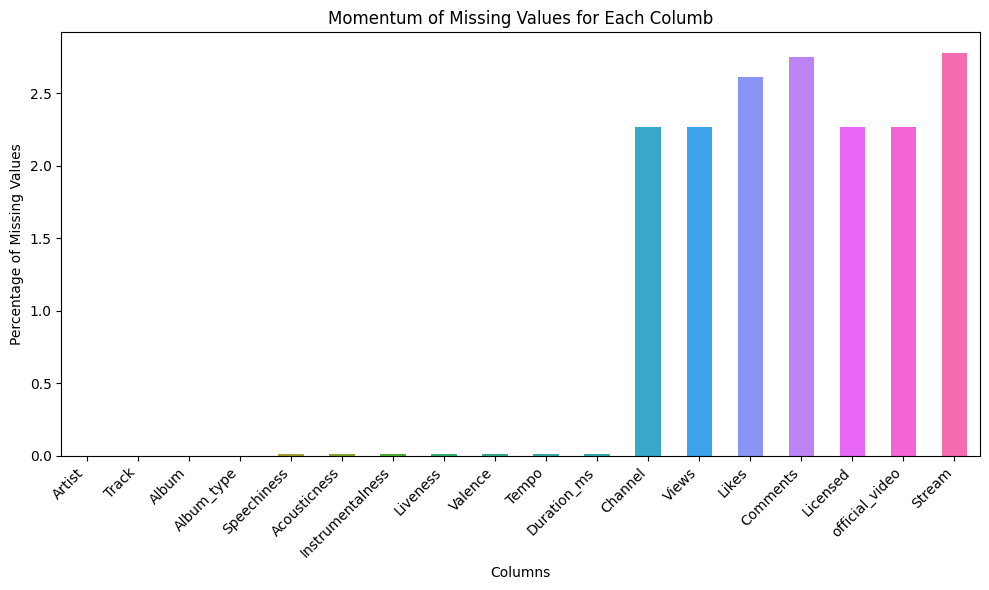

In [91]:
# Define a custom color palette
colors = sns.color_palette('husl', len(missing_values))

# Calculte the momentum of missing values for each column
missing_values_momentum = (df.isnull().sum() / len(df)) * 100

# Create a bar plot with custom colors
plt.figure(figsize=(10,6))
missing_values_momentum.plot(kind='bar', color=colors)
plt.title('Momentum of Missing Values for Each Columb')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation = 45, ha= 'right')
plt.tight_layout()
plt.show()

* Handle nulls by filling in the mean value  
Because Speechiness, Acousticness, Instrumentalness, Liveness, Valence, Tempo, Duration_ms have only 2 missing values each

In [92]:
columns_with_few_missing = ['Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms']

for column in columns_with_few_missing:
    df[column].fillna(df[column].mean(), inplace=True)

* Handle nulls by drop column

In [93]:
columns_with_many_missing = ['Channel', 'Views', 'Likes', 'Comments', 'Licensed', 'official_video', 'Stream']

for column in columns_with_many_missing:
    df.dropna(subset=[column], inplace = True)

* Dataset after handling nulls

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19550 entries, 0 to 20717
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            19550 non-null  object 
 1   Track             19550 non-null  object 
 2   Album             19550 non-null  object 
 3   Album_type        19550 non-null  object 
 4   Speechiness       19550 non-null  float64
 5   Acousticness      19550 non-null  float64
 6   Instrumentalness  19550 non-null  float64
 7   Liveness          19550 non-null  float64
 8   Valence           19550 non-null  float64
 9   Tempo             19550 non-null  float64
 10  Duration_ms       19550 non-null  float64
 11  Channel           19550 non-null  object 
 12  Views             19550 non-null  float64
 13  Likes             19550 non-null  float64
 14  Comments          19550 non-null  float64
 15  Licensed          19550 non-null  object 
 16  official_video    19550 non-null  object 
 17

In [95]:
# Show Num of Missing values in each column
print(df.isna().sum())

Artist              0
Track               0
Album               0
Album_type          0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Duration_ms         0
Channel             0
Views               0
Likes               0
Comments            0
Licensed            0
official_video      0
Stream              0
dtype: int64


In [108]:
# Set comma display for float numbers
pd.options.display.float_format = '{:,.2f}'.format

In [109]:
# Select only the numerical columns for descriptive statistics
numerical_columns = df.select_dtypes(include=['float64'])
numerical_des = numerical_columns.describe()
print(numerical_des)

       Speechiness  Acousticness  Instrumentalness  Liveness   Valence  \
count    19,550.00     19,550.00         19,550.00 19,550.00 19,550.00   
mean          0.10          0.29              0.06      0.19      0.53   
std           0.11          0.29              0.19      0.17      0.25   
min           0.00          0.00              0.00      0.01      0.00   
25%           0.04          0.04              0.00      0.09      0.34   
50%           0.05          0.19              0.00      0.12      0.54   
75%           0.10          0.47              0.00      0.23      0.72   
max           0.96          1.00              1.00      1.00      0.99   

          Tempo  Duration_ms            Views         Likes      Comments  \
count 19,550.00    19,550.00        19,550.00     19,550.00     19,550.00   
mean     120.61   224,628.13    95,452,488.77    670,022.89     27,862.68   
std       29.62   126,909.31   277,567,847.56  1,805,011.85    195,902.45   
min        0.00    30,985

> Exploring Album type

In [98]:
album_type_count = df['Album_type'].value_counts()
print(album_type_count)

Album_type
album          14149
single          4689
compilation      712
Name: count, dtype: int64


> Pie chart

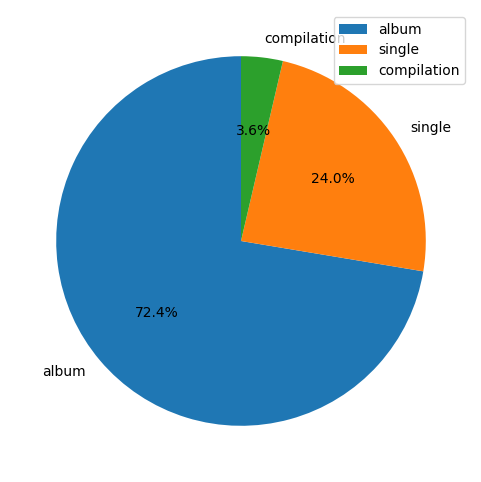

In [99]:
labels = album_type_count.index.tolist()
sizes = album_type_count.values.tolist()

plt.figure(figsize=(15,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.legend(labels, loc='best')

plt.show()

> From the above pie chart, we can make the following conclusions:
* Nhận xét

> Analyzing songs by artist and stream - spotify, views - youtube

In [100]:
# Group the songs by artist and stream - spotify, views - youtube
artist_group = df.groupby('Artist')[['Stream','Views']].sum()

# Sort the artists by the sum of streams and views in descending order
artist_sort = artist_group.sort_values(['Stream', 'Views'], ascending=False)

# Get the top 10 Artist with the most number of streams on Spotify and views on Youtube
top_10_artist = artist_sort.head(10)

top_10_artist

,Stream,Views
Artist,,
Post Malone,"15,251,263,853.00","6,394,420,209.00"
Ed Sheeran,"14,394,881,557.00","15,460,207,769.00"
Dua Lipa,"13,408,076,274.00","8,216,339,307.00"
The Weeknd,"12,464,283,476.00","6,859,509,344.00"
Justin Bieber,"12,097,767,422.00","10,991,060,236.00"
XXXTENTACION,"12,011,910,355.00","2,542,795,388.00"
Imagine Dragons,"11,858,310,928.00","9,093,785,238.00"
Coldplay,"11,778,478,236.00","9,997,277,884.00"
Khalid,"11,386,839,915.00","5,398,246,275.00"


In [101]:
# Create dataframes for streams and views
df_streams = df.groupby('Artist')['Stream'].sum().sort_values(ascending=False)[:10]
df_views = df.groupby('Artist')['Views'].sum().sort_values(ascending=False)[:10]

display(df_streams)
display(df_views)

Artist
Post Malone       15,251,263,853.00
Ed Sheeran        14,394,881,557.00
Dua Lipa          13,408,076,274.00
The Weeknd        12,464,283,476.00
Justin Bieber     12,097,767,422.00
XXXTENTACION      12,011,910,355.00
Imagine Dragons   11,858,310,928.00
Coldplay          11,778,478,236.00
Khalid            11,386,839,915.00
Bruno Mars        10,897,862,950.00
Name: Stream, dtype: float64

Artist
Ed Sheeran                15,460,207,769.00
CoComelon                 14,601,671,211.00
Katy Perry                13,120,632,075.00
Charlie Puth              12,167,594,191.00
Luis Fonsi                11,628,113,031.00
Justin Bieber             10,991,060,236.00
Daddy Yankee              10,871,926,842.00
Bruno Mars                10,240,919,227.00
Macklemore & Ryan Lewis   10,122,055,560.00
Coldplay                   9,997,277,884.00
Name: Views, dtype: float64

> Bar chart

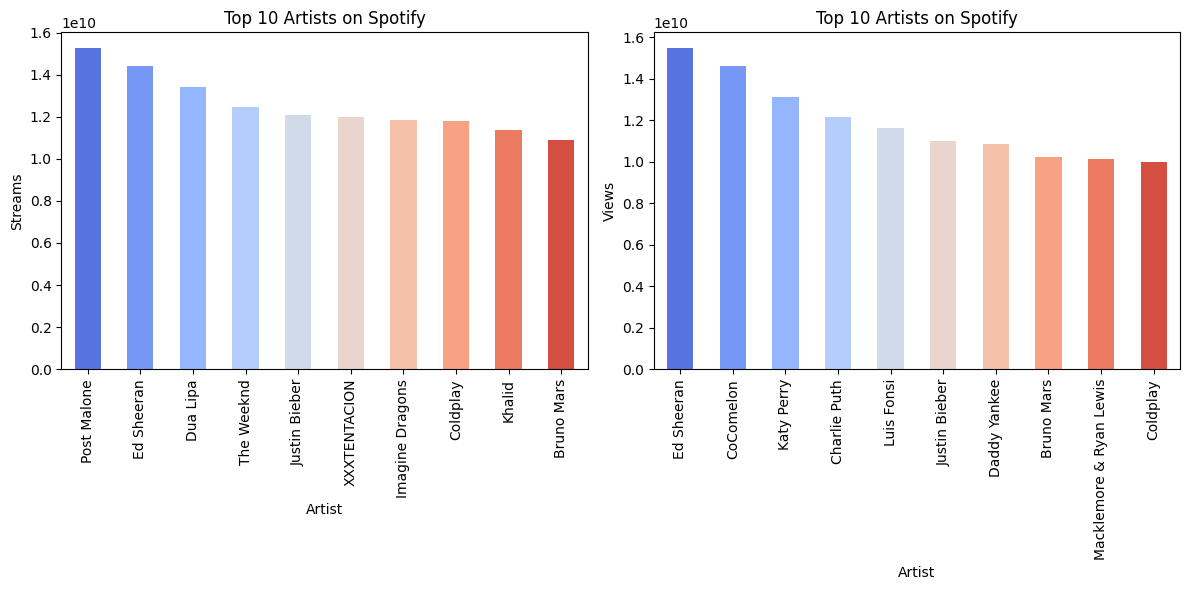

In [102]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Create color the columns
colors_streams = sns.color_palette('coolwarm', len(df_streams))
colors_views = sns.color_palette('coolwarm', len(df_views))

# Top 10 streams on Spotify
ax1.set_title('Top 10 Artists on Spotify')
df_streams.plot(kind='bar', ax=ax1, color=colors_streams)
ax1.set_xlabel('Artist')
ax1.set_ylabel('Streams')

# Top 10 views on Youtube
ax2.set_title('Top 10 Artists on Spotify')
df_views.plot(kind='bar', ax=ax2, color=colors_views)
ax2.set_xlabel('Artist')
ax2.set_ylabel('Views')

fig.tight_layout()
plt.show()


> Nhận xét...

> Analyzing Top 10 songs on the basis views, comments and likes

* Because there are many songs with many artists singing in the dataframe, we create another dataframe to analyze views, comments and likes.

In [103]:
# Drop column 'Artist'
df_tracks = df.drop('Artist', axis=1)

# Remove duplicate rows base on column 'Track'
df_tracks = df_tracks.drop_duplicates(subset=['Track'])

df_tracks.head(5)

,Track,Album,Album_type,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Channel,Views,Likes,Comments,Licensed,official_video,Stream
0,Feel Good Inc.,Demon Days,album,0.18,0.01,0.00,0.61,0.77,138.56,"222,640.00",Gorillaz,"693,555,221.00","6,220,896.00","169,907.00",True,True,"1,040,234,854.00"
1,Rhinestone Eyes,Plastic Beach,album,0.03,0.09,0.00,0.05,0.85,92.76,"200,173.00",Gorillaz,"72,011,645.00","1,079,128.00","31,003.00",True,True,"310,083,733.00"
2,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.05,0.04,0.05,0.12,0.55,108.01,"215,150.00",Gorillaz,"8,435,055.00","282,142.00","7,399.00",True,True,"63,063,467.00"
3,On Melancholy Hill,Plastic Beach,album,0.03,0.00,0.51,0.06,0.58,120.42,"233,867.00",Gorillaz,"211,754,952.00","1,788,577.00","55,229.00",True,True,"434,663,559.00"
4,Clint Eastwood,Gorillaz,album,0.17,0.03,0.00,0.07,0.53,167.95,"340,920.00",Gorillaz,"618,480,958.00","6,197,318.00","155,930.00",True,True,"617,259,738.00"


In [104]:
# Top 10 songs based on views
top_10_song_by_views = df_tracks.nlargest(10, 'Views')

# Top 10 songs based on comments
top_10_song_by_comments = df_tracks.nlargest(10, 'Comments')

# Top 10 songs based on likes
top_10_song_by_likes = df_tracks.nlargest(10, 'Likes')

display(top_10_song_by_views)
display(top_10_song_by_comments)
display(top_10_song_by_likes)

,Track,Album,Album_type,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Channel,Views,Likes,Comments,Licensed,official_video,Stream
365,Despacito,VIDA,album,0.15,0.20,0.00,0.07,0.84,177.93,"229,360.00",LuisFonsiVEVO,"8,079,646,911.00","50,788,626.00","4,252,791.00",True,True,"1,506,598,267.00"
12452,Shape of You,÷ (Deluxe),album,0.08,0.58,0.00,0.09,0.93,95.98,"233,713.00",Ed Sheeran,"5,908,398,479.00","31,047,780.00","1,130,327.00",True,True,"3,362,005,201.00"
12469,See You Again (feat. Charlie Puth),See You Again (feat. Charlie Puth),single,0.08,0.37,0.00,0.06,0.28,80.03,"229,526.00",Wiz Khalifa Music,"5,773,797,147.00","40,147,618.00","2,127,345.00",True,True,"1,521,254,554.00"
20303,Wheels on the Bus,"CoComelon Kids Hits, Vol. 1",album,0.04,0.18,0.00,0.16,0.96,125.02,"207,340.00",Cocomelon - Nursery Rhymes,"4,898,831,101.00","14,396,841.00",0.00,True,True,"83,434,355.00"
10686,Uptown Funk (feat. Bruno Mars),Uptown Special,album,0.08,0.01,0.00,0.03,0.93,114.99,"269,667.00",MarkRonsonVEVO,"4,821,016,218.00","20,067,879.00","598,916.00",True,True,"1,653,819,736.00"
8937,Gangnam Style (강남스타일),Gangnam Style (강남스타일),single,0.29,0.00,0.00,0.09,0.75,132.07,"219,493.00",officialpsy,"4,679,767,471.00","26,399,133.00","5,331,537.00",False,False,"370,991,124.00"
13032,Roar,PRISM,album,0.03,0.00,0.00,0.35,0.44,90.00,"223,546.00",KatyPerryVEVO,"3,725,748,519.00","15,864,499.00","763,366.00",True,True,"884,721,001.00"
13040,Counting Stars,Native,album,0.04,0.07,0.00,0.12,0.48,122.02,"257,840.00",OneRepublicVEVO,"3,721,610,307.00","16,558,621.00","475,191.00",True,True,"1,805,319,715.00"
14074,Sorry,Purpose (Deluxe),album,0.04,0.08,0.00,0.30,0.41,99.94,"200,787.00",JustinBieberVEVO,"3,627,305,503.00","15,789,307.00","865,675.00",True,True,"1,740,759,086.00"
12455,Thinking out Loud,x (Wembley Edition),album,0.03,0.47,0.00,0.18,0.59,79.00,"281,560.00",Ed Sheeran,"3,547,155,867.00","14,343,730.00","362,545.00",True,True,"2,154,334,378.00"


,Track,Album,Album_type,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Channel,Views,Likes,Comments,Licensed,official_video,Stream
14566,Butter,Proof,album,0.09,0.00,0.00,0.08,0.69,110.00,"164,952.00",HYBE LABELS,"850,329,651.00","22,723,127.00","9,131,761.00",True,True,"1,066,001,876.00"
14565,Boy With Luv (feat. Halsey),MAP OF THE SOUL : PERSONA,album,0.08,0.09,0.00,0.19,0.80,119.95,"229,773.00",HYBE LABELS,"1,634,109,865.00","27,588,189.00","6,535,721.00",True,True,"989,478,029.00"
8937,Gangnam Style (강남스타일),Gangnam Style (강남스타일),single,0.29,0.00,0.00,0.09,0.75,132.07,"219,493.00",officialpsy,"4,679,767,471.00","26,399,133.00","5,331,537.00",False,False,"370,991,124.00"
17999,How You Like That,THE ALBUM,album,0.08,0.05,0.00,0.06,0.34,130.03,"182,956.00",BLACKPINK,"1,182,611,467.00","24,290,306.00","5,130,725.00",True,True,"733,213,843.00"
365,Despacito,VIDA,album,0.15,0.20,0.00,0.07,0.84,177.93,"229,360.00",LuisFonsiVEVO,"8,079,646,911.00","50,788,626.00","4,252,791.00",True,True,"1,506,598,267.00"
17996,Pink Venom,BORN PINK,album,0.20,0.01,0.00,0.22,0.71,180.06,"186,964.00",BLACKPINK,"530,630,417.00","14,969,274.00","3,637,659.00",True,True,"386,806,735.00"
14567,Permission to Dance,Permission to Dance,single,0.04,0.01,0.00,0.34,0.65,124.92,"187,585.00",HYBE LABELS,"563,221,859.00","17,090,534.00","3,486,944.00",True,True,"560,895,612.00"
18004,DDU-DU DDU-DU,SQUARE UP,single,0.07,0.04,0.00,0.09,0.39,140.04,"211,350.00",BLACKPINK,"2,012,854,627.00","22,570,280.00","3,312,226.00",True,True,"565,754,284.00"
12080,MIC Drop (Steve Aoki Remix) - Full Length Edition,Love Yourself 結 'Answer',album,0.18,0.01,0.00,0.21,0.54,170.01,"307,676.00",HYBE LABELS,"1,300,861,371.00","19,663,558.00","3,109,122.00",True,True,"268,319,144.00"
14563,Yet To Come,Proof,album,0.19,0.04,0.00,0.33,0.68,172.03,"193,594.00",HYBE LABELS,"176,612,886.00","10,687,920.00","2,984,558.00",True,True,"248,247,928.00"


,Track,Album,Album_type,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Channel,Views,Likes,Comments,Licensed,official_video,Stream
365,Despacito,VIDA,album,0.15,0.20,0.00,0.07,0.84,177.93,"229,360.00",LuisFonsiVEVO,"8,079,646,911.00","50,788,626.00","4,252,791.00",True,True,"1,506,598,267.00"
12469,See You Again (feat. Charlie Puth),See You Again (feat. Charlie Puth),single,0.08,0.37,0.00,0.06,0.28,80.03,"229,526.00",Wiz Khalifa Music,"5,773,797,147.00","40,147,618.00","2,127,345.00",True,True,"1,521,254,554.00"
12452,Shape of You,÷ (Deluxe),album,0.08,0.58,0.00,0.09,0.93,95.98,"233,713.00",Ed Sheeran,"5,908,398,479.00","31,047,780.00","1,130,327.00",True,True,"3,362,005,201.00"
14565,Boy With Luv (feat. Halsey),MAP OF THE SOUL : PERSONA,album,0.08,0.09,0.00,0.19,0.80,119.95,"229,773.00",HYBE LABELS,"1,634,109,865.00","27,588,189.00","6,535,721.00",True,True,"989,478,029.00"
16668,Faded,Different World,album,0.05,0.03,0.00,0.11,0.16,179.64,"212,107.00",Alan Walker,"3,400,741,854.00","26,446,178.00","1,250,054.00",True,True,"1,683,178,074.00"
8937,Gangnam Style (강남스타일),Gangnam Style (강남스타일),single,0.29,0.00,0.00,0.09,0.75,132.07,"219,493.00",officialpsy,"4,679,767,471.00","26,399,133.00","5,331,537.00",False,False,"370,991,124.00"
140,lovely (with Khalid),lovely (with Khalid),single,0.03,0.93,0.00,0.10,0.12,115.28,"200,186.00",BillieEilishVEVO,"1,721,382,178.00","24,425,840.00","561,909.00",True,True,"2,110,573,779.00"
17999,How You Like That,THE ALBUM,album,0.08,0.05,0.00,0.06,0.34,130.03,"182,956.00",BLACKPINK,"1,182,611,467.00","24,290,306.00","5,130,725.00",True,True,"733,213,843.00"
18001,Kill This Love,KILL THIS LOVE,single,0.19,0.32,0.00,0.23,0.65,131.88,"191,050.00",BLACKPINK,"1,734,794,444.00","24,061,574.00","2,466,445.00",True,True,"661,790,347.00"
14566,Butter,Proof,album,0.09,0.00,0.00,0.08,0.69,110.00,"164,952.00",HYBE LABELS,"850,329,651.00","22,723,127.00","9,131,761.00",True,True,"1,066,001,876.00"


> Horizontal bar chart

<Figure size 1200x600 with 0 Axes>

c:\Users\hghaa\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hghaa\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hghaa\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hghaa\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hghaa\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:

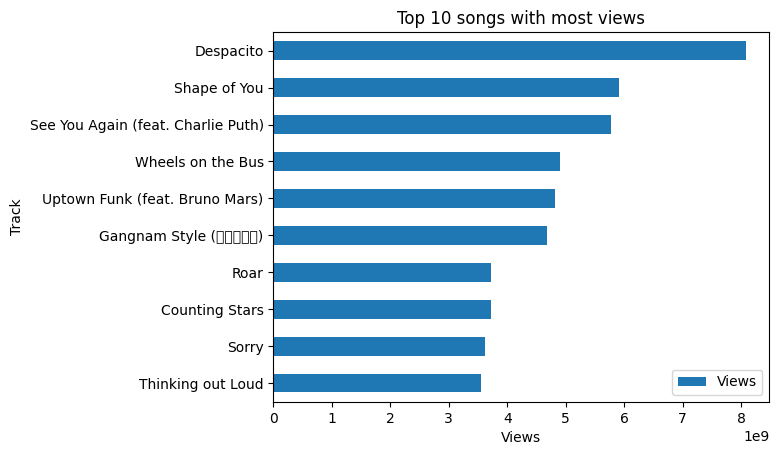

In [110]:
plt.figure(figsize=(12, 6))
top_10_song_by_views.sort_values(by='Views', ascending=True).plot(kind='barh', x='Track', y='Views', title='Top 10 songs with most views')
plt.xlabel('Views')
plt.ylabel('Track')
plt.show()